In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('./data/AirQualityUCI_1.csv',parse_dates=True, index_col=0 )
df.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
date,,,,,,,,,,,,,
2004-01-04 00:00:00,1.6,1143.0,106.0,6.3,825.0,96.0,986.0,86.0,1477.0,978.0,12.0,61.6,0.8593
2004-01-04 01:00:00,1.2,1044.0,100.0,5.1,770.0,85.0,1031.0,70.0,1425.0,944.0,11.5,63.9,0.8652
2004-01-04 02:00:00,1.1,1034.0,71.0,4.1,716.0,50.0,1085.0,55.0,1405.0,891.0,10.7,67.2,0.8630
2004-01-04 03:00:00,0.9,956.0,72.0,4.0,713.0,-200.0,1099.0,-200.0,1422.0,849.0,9.0,73.1,0.8394
2004-01-04 04:00:00,0.7,909.0,44.0,2.4,615.0,57.0,1237.0,49.0,1322.0,790.0,10.2,66.6,0.8299


In [42]:
# 데이터 좋은 상태 기간
df = df.loc["2004-04-01":"2005-04-30"]

In [43]:
# 1시간 단위로 맞춰주기
df = df.asfreq("1H")

In [44]:
# sensor 데이터 + T, RH만 분석
use_col = []
sensor_col = [col for col in df.columns if "sensor" in col]
use_col.extend(sensor_col)
use_col.extend(["T","RH"])
use_col

['CO_sensor',
 'NMHC_sensor',
 'NOx_sensor',
 'NO2_sensor',
 'O3_sensor',
 'T',
 'RH']

In [45]:
df = df[use_col]
df.head()

,CO_sensor,NMHC_sensor,NOx_sensor,NO2_sensor,O3_sensor,T,RH
date,,,,,,,
2004-04-04 00:00:00,1224.0,892.0,884.0,1580.0,923.0,16.7,56.5
2004-04-04 01:00:00,1215.0,843.0,929.0,1551.0,862.0,15.9,59.2
2004-04-04 02:00:00,1115.0,782.0,980.0,1500.0,752.0,15.2,62.4
2004-04-04 03:00:00,1124.0,793.0,965.0,1521.0,791.0,14.7,65.0
2004-04-04 04:00:00,1028.0,682.0,1090.0,1448.0,697.0,14.3,65.3


In [46]:
# 음수값 비워놓기
df[df<0] = np.NAN

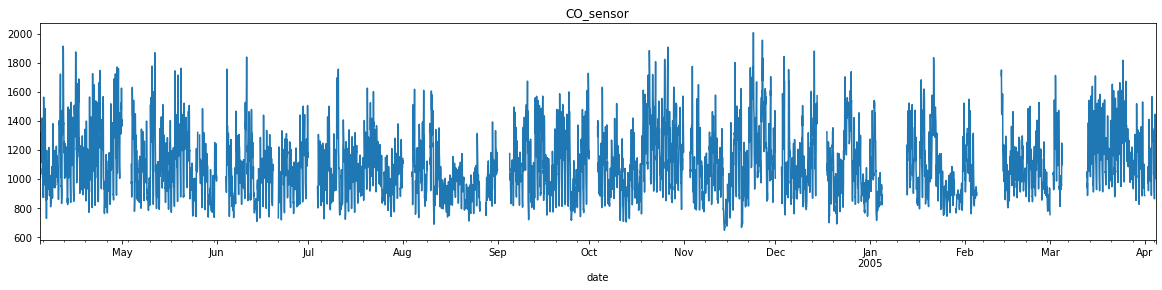

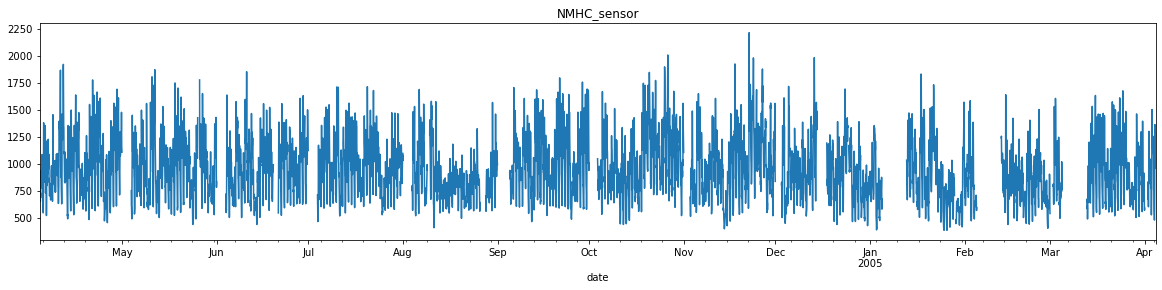

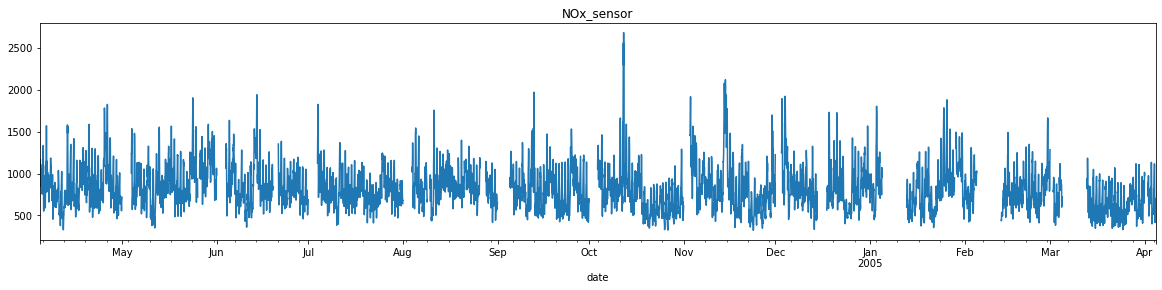

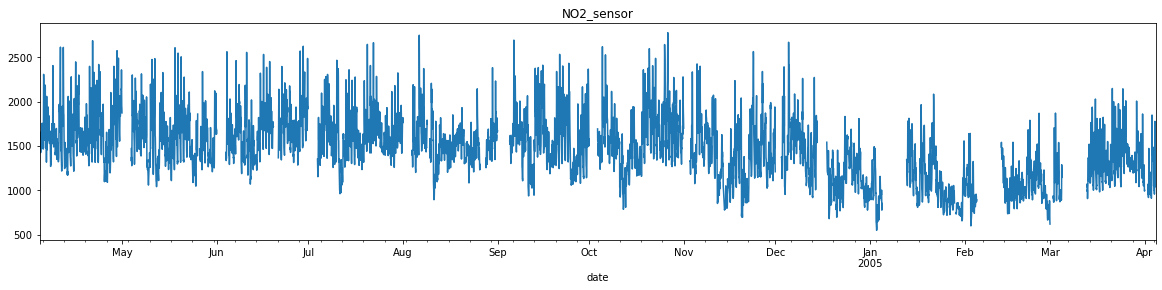

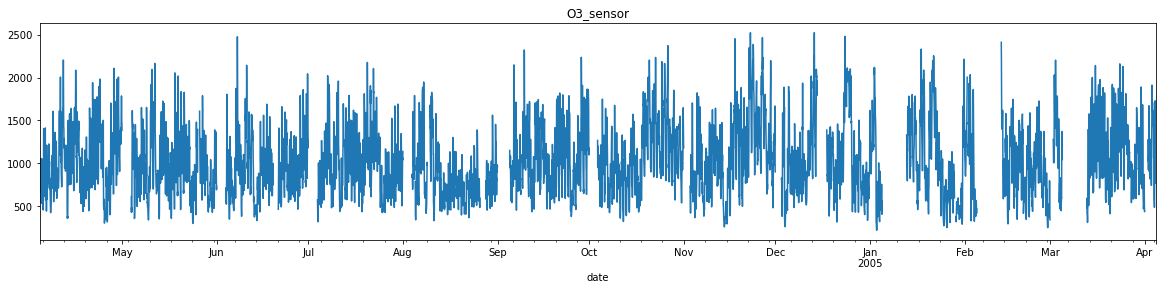

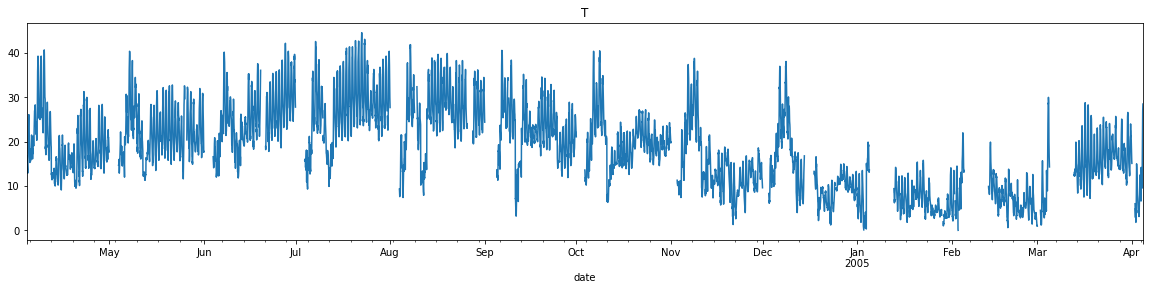

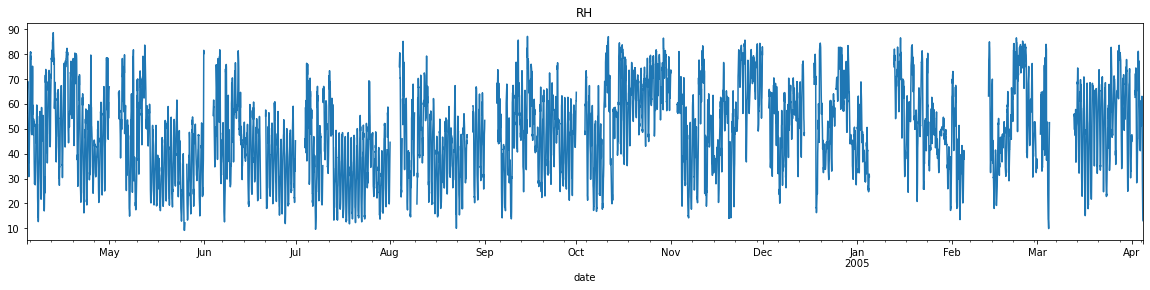

In [47]:
# 데이터 시각화
for col in df.columns:
    df[col].plot(figsize=(20,4))
    plt.title(col)
    plt.show()

# EDA

In [48]:
df['date'] = df.index.date
df['time_of_day'] = df.index.hour
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['week_of_year'] = df.index.weekofyear

 ## daily seasonality

In [49]:
df.groupby('time_of_day').mean()

,CO_sensor,NMHC_sensor,NOx_sensor,NO2_sensor,O3_sensor,T,RH,month,day_of_week,week_of_year
time_of_day,,,,,,,,,,
0,1051.169935,865.875817,845.189542,1382.362745,984.673203,16.488235,54.869935,6.519126,3.000000,27.177596
1,990.540717,792.231270,907.697068,1324.811075,887.198697,16.100651,56.006189,6.519126,3.000000,27.177596
2,930.584416,710.418831,999.318182,1268.766234,787.379870,15.714007,57.198052,6.519126,3.000000,27.177596
3,892.711974,655.893204,1074.757282,1234.488673,721.705502,15.250000,58.479288,6.519126,3.000000,27.177596
4,874.703226,628.419355,1114.725806,1217.887097,690.519355,14.897403,59.609677,6.519126,3.000000,27.177596
5,883.893548,642.474194,1096.593548,1230.525806,706.280645,14.624675,60.322258,6.519126,3.000000,27.177596
6,948.207120,738.731392,982.741100,1305.708738,814.038835,14.426059,60.850162,6.519126,3.000000,27.177596
7,1111.831715,958.213592,816.928803,1519.796117,1056.336570,14.793160,59.460194,6.519126,3.000000,27.177596
8,1222.275081,1131.634304,699.142395,1688.288026,1255.553398,15.755700,56.533657,6.519126,3.000000,27.177596


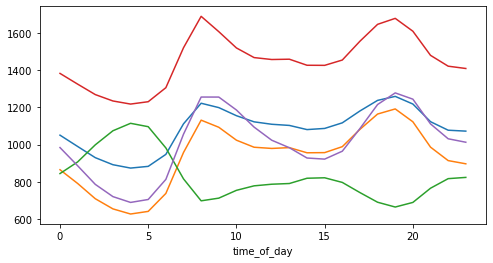

In [50]:
for col in sensor_col:
    df.groupby('time_of_day').mean()[col].plot(figsize=(8,4))